# rates_over_time.ipynb

This notebook describes the number of events over time

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from IPython.display import display

In [2]:
def format_df(file, code):
    df = pd.read_csv(
        "../output/cohorts/input_{}.csv".format(file),
        parse_dates=['sick_note_1_date'],
        low_memory=False
    )
    df = df.loc[~df.sick_note_1_date.isnull()]
    df['sick_note_week'] = df['sick_note_1_date'].apply(lambda x: x.isocalendar()[1] if not pd.isnull(x) else '')
    df[file+'_sick_note'] = 1
    df.loc[~df[code].isna(), file+'_code_use'] = 1
    df = df[['sick_note_week',file+'_code_use']].groupby('sick_note_week').sum().dropna()
    return df

def generic_graph_settings(ax, title):
    xlim = ax.get_xlim()
    ax.grid(b=False)
    ax.set_title(title, loc="center")
    ax.set_xlim(xlim)
    ax.set_ylim(ymin=0)
    plt.tight_layout()

def code_use_per_week_graph(code):
    covid_df = format_df('covid_2020',code)
    general2019_df = format_df('general_2019',code)
    general2020_df = format_df('general_2020',code)
    pneumonia_df = format_df('pneumonia_2019',code)
    
    week_total = pd.concat([covid_df, general2019_df, 
                            general2020_df, pneumonia_df], axis=1)

    ax = week_total.plot(kind="bar", width=0.8, figsize=(24, 16))
    condition = code[5:].replace("_", " ").title()
    title = f"Code Use per Week ({condition})"
    ax.xaxis.label.set_visible(False)
    ax.set_ylabel("Count")
    generic_graph_settings(ax, title)
    plt.savefig(f"../output/{code}_use_per_week.png")
    plt.show()
    plt.close()

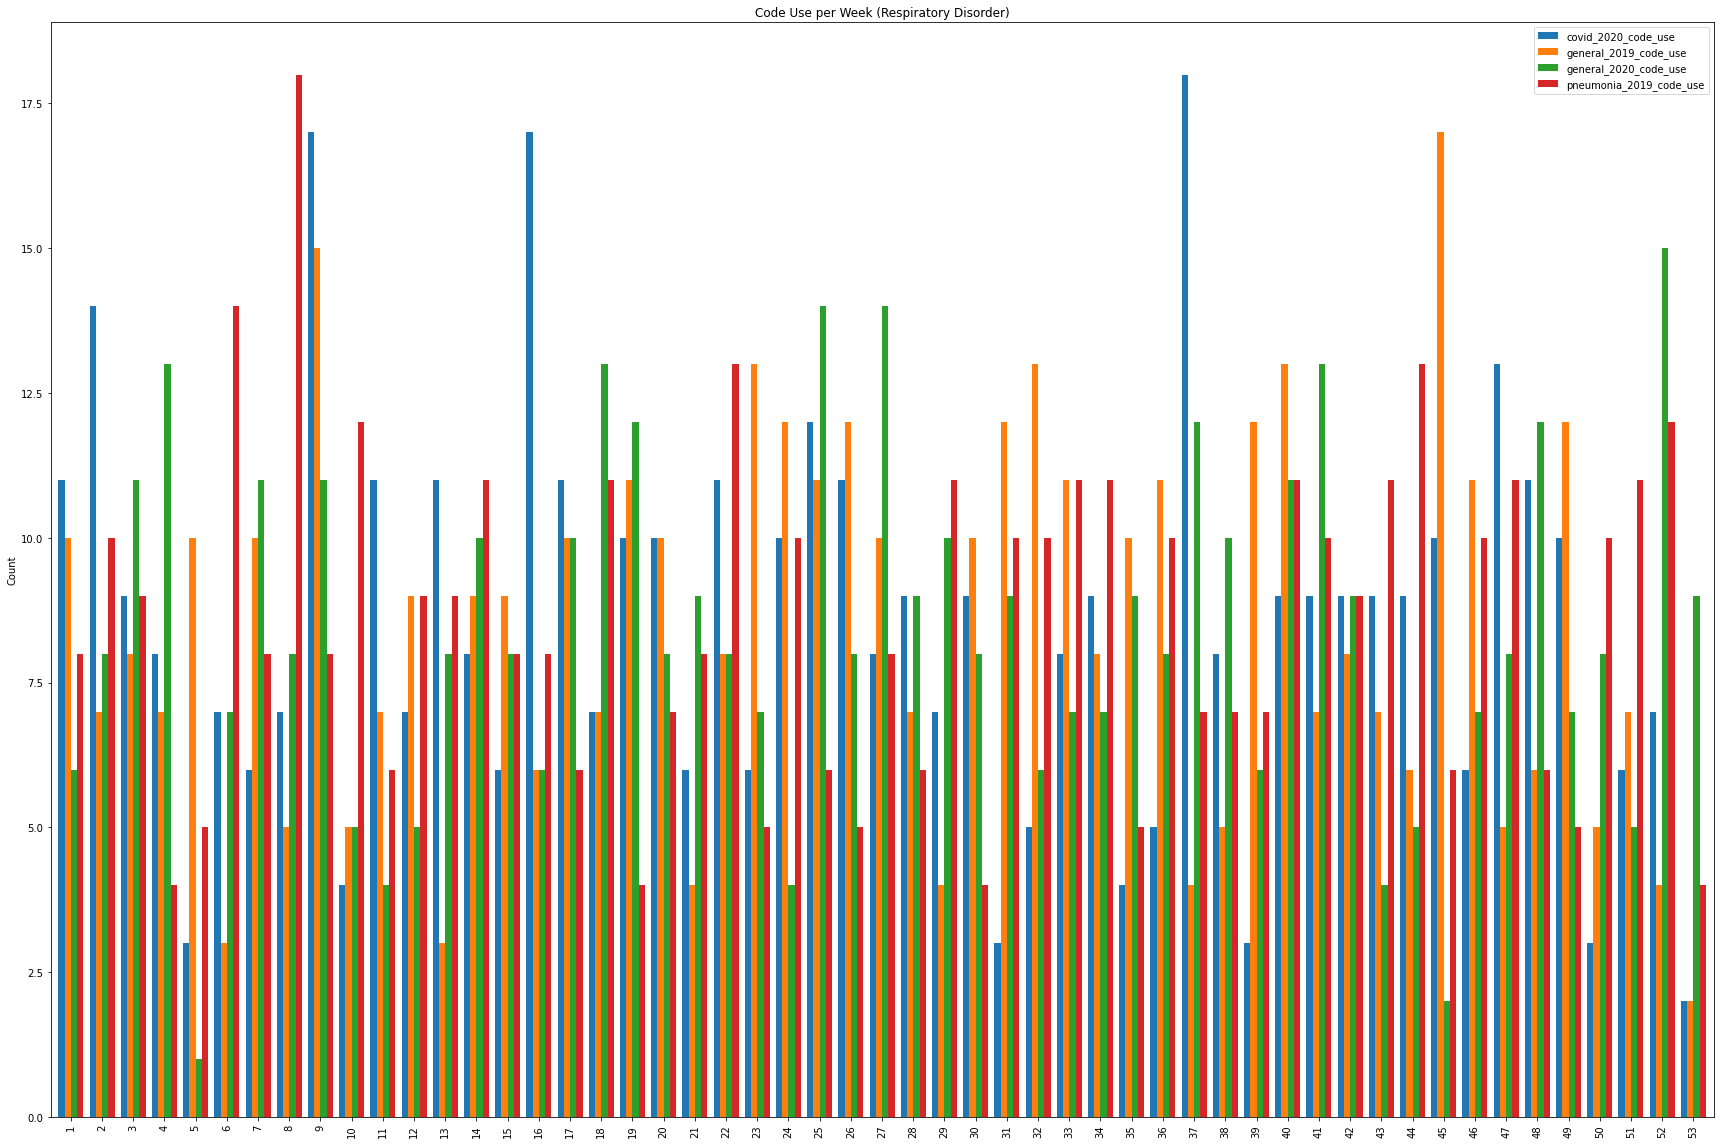

In [3]:
code_use_per_week_graph('diag_respiratory_disorder')